In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_csv('final.csv')

In [5]:
df.head()

,Unnamed: 0,Age dependency ratio (% of working-age population),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arms imports (SIPRI trend indicator values),Broad money (% of GDP),Broad money to total reserves ratio,Changes in inventories (current US$),"Claims on central government, etc. (% GDP)",Consumer price index (2010 = 100),...,"Population, total",Rural population,Rural population (% of total population),"Services, value added (% of GDP)",Taxes less subsidies on products (current US$),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),Urban population,Urban population (% of total population)
0,1960 [YR1960],76.999045,41.312839,1.529810e+10,5.440000e+08,22.071925,12.116774,4.571559e+08,15.000062,2.527487,...,450547675.0,369791510.0,82.076,38.782462,2.035209e+09,6.745366e+08,423000000.0,11.296833,80756165.0,17.924
1,1961 [YR1961],78.007106,40.387402,1.584496e+10,1.122000e+09,21.501873,12.659441,-3.809357e+08,14.725330,2.570333,...,459642166.0,376759491.0,81.968,38.325875,2.303808e+09,6.663571e+08,418000000.0,10.261163,82882675.0,18.032
2,1962 [YR1962],79.187531,38.371335,1.617792e+10,3.710000e+08,21.930703,18.031311,1.965947e+08,15.186626,2.663693,...,469077191.0,383620708.0,81.782,39.935845,2.674898e+09,5.127918e+08,265000000.0,10.200790,85456483.0,18.218
3,1963 [YR1963],80.304725,39.319751,1.903938e+10,6.470000e+08,21.116283,16.821091,-3.076154e+08,14.641317,2.742170,...,478825602.0,390697750.0,81.595,38.095180,3.294071e+09,6.078625e+08,360000000.0,10.187338,88127852.0,18.405
4,1964 [YR1964],80.998952,41.187738,2.326295e+10,9.200000e+08,19.806398,22.411741,-2.171540e+08,13.448422,3.108394,...,488848139.0,397946828.0,81.405,36.340821,3.758864e+09,4.991451e+08,251000000.0,9.410549,90901311.0,18.595


In [6]:
df = df.rename({'Unnamed: 0':'year'},axis = 1)

In [7]:
df.dtypes

year                                                              object
Age dependency ratio (% of working-age population)               float64
Agriculture, forestry, and fishing, value added (% of GDP)       float64
Agriculture, forestry, and fishing, value added (current US$)    float64
Arms imports (SIPRI trend indicator values)                      float64
                                                                  ...   
Total reserves (includes gold, current US$)                      float64
Total reserves minus gold (current US$)                          float64
Trade (% of GDP)                                                 float64
Urban population                                                 float64
Urban population (% of total population)                         float64
Length: 68, dtype: object

In [8]:
df.year[0]

'1960 [YR1960]'

In [9]:
year = []
for i in df.year:
     year.append(i.split(' ')[0])
df.year = year

In [10]:
df.year

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
56    2016
57    2017
58    2018
59    2019
60    2020
Name: year, Length: 61, dtype: object

In [11]:
df['year'] = pd.to_datetime(df['year'],dayfirst=True)

In [12]:
columns = list(df.columns)

In [13]:
x = df[[i for i in columns if i not in'GDP per capita (current US$)']]
y = df['GDP per capita (current US$)']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/6)

In [15]:
first_diff = df['GDP per capita (current US$)'].diff()[1:]
second_diff = first_diff.diff()[1:]

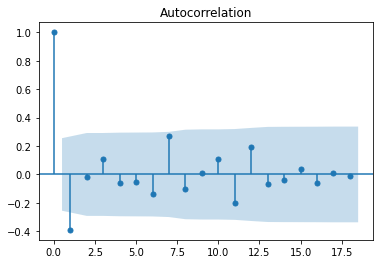

In [16]:
plot_acf(second_diff)
plt.show()

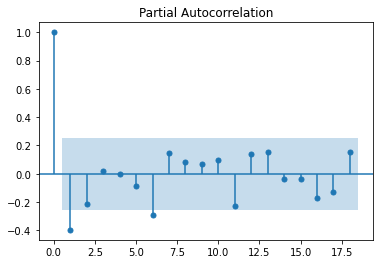

In [17]:
plot_pacf(second_diff)
plt.show()

In [18]:
train = df['GDP per capita (current US$)'][:int(len(df)*5/6)]

In [19]:
arima = ARIMA(train,order = (2,2,2))

C:\Users\joani\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
arima = arima.fit()

C:\Users\joani\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [21]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ARIMA Model Results                                    
===========================================================================================
Dep. Variable:     D2.GDP per capita (current US$)   No. Observations:                   48
Model:                              ARIMA(2, 2, 2)   Log Likelihood                -239.871
Method:                                    css-mle   S.D. of innovations             34.671
Date:                             Sun, 05 Dec 2021   AIC                            491.742
Time:                                     15:57:06   BIC                            502.969
Sample:                                          2   HQIC                           495.984
                                                                                           
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.2517      0.596      2.102      0.036       0.085       2.419
ar.L1.D2.GDP per capita (current US$)     0.0866      0.388      0.223      0.823      -0.674       0.847
ar.L2.D2.GDP per capita (current US$)     0.4242      0.150      2.818      0.005       0.129       0.719
ma.L1.D2.GDP per capita (current US$)    -1.0849      0.405     -2.680      0.007      -1.878      -0.291
ma.L2.D2.GDP per capita (current US$)     0.0849      0.399      0.213      0.831      -0.697       0.867
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4368           +0.0000j            1.4368            0.0000
AR.2           -1.6409           +0.0000j            1.6409            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           11.7743           +0.0000j           11.7743            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
test_data,se,conf = arima.forecast(int(len(df)*1/6),alpha = 0.02)
test_data

array([1127.24960095, 1200.9431897 , 1246.29117659, 1310.32939206,
       1364.57481474, 1426.51265904, 1485.57509352, 1548.26389028,
       1610.65939376, 1675.18010833])

In [23]:
actual = df['GDP per capita (current US$)'][len(train)+1:]

In [24]:
mean_squared_error(actual,test_data)

116849.84323856281

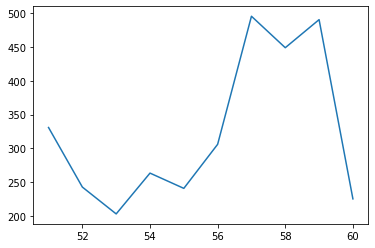

In [25]:
plt.plot(actual-test_data)

In [26]:
data = df[['year','GDP per capita (current US$)']]

In [27]:
data

,year,GDP per capita (current US$)
0,1960-01-01,82.188603
1,1961-01-01,85.354301
2,1962-01-01,89.881756
3,1963-01-01,101.126429
4,1964-01-01,115.537496
...,...,...
56,2016-01-01,1732.554242
57,2017-01-01,1980.667020
58,2018-01-01,1996.915087
59,2019-01-01,2100.751461


In [28]:
data.columns = ['ds','y']

In [29]:
data

,ds,y
0,1960-01-01,82.188603
1,1961-01-01,85.354301
2,1962-01-01,89.881756
3,1963-01-01,101.126429
4,1964-01-01,115.537496
...,...,...
56,2016-01-01,1732.554242
57,2017-01-01,1980.667020
58,2018-01-01,1996.915087
59,2019-01-01,2100.751461


In [30]:
model = fbprophet.Prophet()

In [ ]:
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyError: 'metric_file'

Exception ignored in: 'stanfit4anon_model_f5236004a3fd5b8429270d00efcc0cf9_9045703871880297330._set_stanargs_from_dict'
Traceback (most recent call last):
  File "C:\Users\joani\anaconda3\lib\site-packages\pystan\model.py", line 550, in optimizing
    ret, sample = fit._call_sampler(stan_args)
KeyError: 'metric_file'


In [57]:
lr = LinearRegression().fit(x_train,y_train)

In [58]:
pred = lr.predict(x_test)

In [68]:
pred

array([ 113.05097401,  163.53975826,  345.78647257, 1619.73357572,
        438.29446918,  950.36978715,  292.34699286, 1954.3036401 ,
        294.20578286,  200.02580214,   83.5691368 ])

In [76]:
mean_squared_error(pred,y_test)

805.7269550916558

In [88]:
df.corr()["GDP per capita (current US$)"]

Age dependency ratio (% of working-age population)              -0.936143
Agriculture, forestry, and fishing, value added (% of GDP)      -0.798051
Agriculture, forestry, and fishing, value added (current US$)    0.996162
Arms imports (SIPRI trend indicator values)                      0.522804
Broad money (% of GDP)                                           0.888648
                                                                   ...   
Total reserves (includes gold, current US$)                      0.976371
Total reserves minus gold (current US$)                          0.974754
Trade (% of GDP)                                                 0.858177
Urban population                                                 0.923091
Urban population (% of total population)                         0.893414
Name: GDP per capita (current US$), Length: 67, dtype: float64

In [106]:
model = Lasso(alpha=1.0)

In [107]:
model.fit(x_train,y_train)

C:\Users\joani\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3650.735285489469, tolerance: 1611.093120216769
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [108]:
pred = model.predict(x_test)

In [109]:
mean_squared_error(pred,y_test)

349.9059535977353